## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouseIDcount = dataset["Mouse ID"].count()
mouseIDcount


1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemouse = dataset[dataset.duplicated(["Mouse ID", "Timepoint"])]
duplicatemouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandataset = dataset.loc[dataset["Mouse ID"]!="g989"]
cleandataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.
mouseIDcount2 = cleandataset["Mouse ID"].count()
mouseIDcount2

1880

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumors = cleandataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumors = cleandataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumors = cleandataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_tumors = cleandataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumors = cleandataset.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
totalsummary = pd.DataFrame({"mean_tumors":mean_tumors, "median_tumors":median_tumors, "variance_tumors":variance_tumors, "standard_tumors":standard_tumors, "sem_tumors":sem_tumors})
totalsummary

,mean_tumors,median_tumors,variance_tumors,standard_tumors,sem_tumors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sumstat = cleandataset.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "std", "var", "sem"]})
sumstat

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

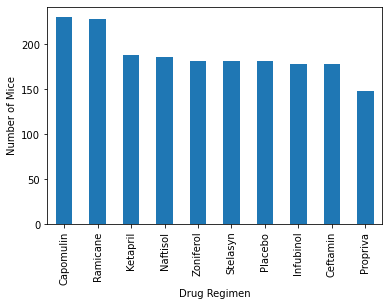

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
value_counts = cleandataset['Drug Regimen'].value_counts()
#value_counts.plot(kind="bar")
value_counts.plot.bar()
plt.xlabel("Drug Regimen")
#plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()

In [43]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# x_axis = np.arange(len(cleandataset))
# tick_locations = [value for value in X_axis]

# plt.figure(figsize=(11,10))
# plt.bar(x_axis, cleandataset["Mouse ID"], color = "r", alpha=0.5, align="center")
# plt.xticks(tick_locations, cleandataset["Drug Regimen"], rotation = "vertical")
# plt.show


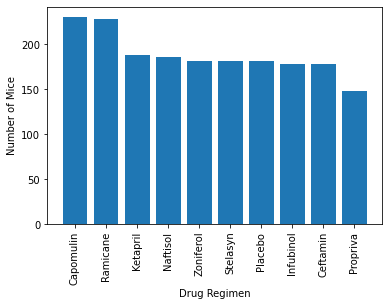

In [44]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
value_counts = cleandataset['Drug Regimen'].value_counts()
plt.bar(value_counts.index.values,value_counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.show()

In [45]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# x_axis = cleandataset(len("Mouse ID"))
# plt.bar(X_axis, "Mouse ID" , color = "b", align = "center")
# plt.show


In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(cleandataset.groupby(["Sex"]).count()).reset_index()
gender_df.head()


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


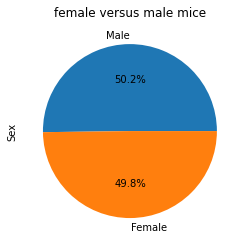

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = dataset.drop_duplicates(subset="Mouse ID")['Sex'].value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.title("female versus male mice")
plt.ylabel("Sex")
plt.show()

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# gender_df = cleandataset[["Sex","Mouse ID"]]
# gender_df.head()

# pies = ["Male", "Female"]
# Pie_numbers = [958,922]
# colors = ["Red", "Green"]
# plt.pie(Pie_numbers)
# plt.show


## Quartiles, Outliers and Boxplots

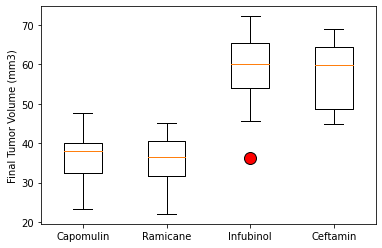

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_tumor_df = cleandataset.groupby(["Mouse ID"]).max()
max_tumor_df = max_tumor_df.reset_index()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data_df = max_tumor_df[['Mouse ID','Timepoint']].merge(cleandataset,on=['Mouse ID','Timepoint'],how="left")
capomulin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data_df.loc[merged_data_df["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

outliers = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=outliers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [50]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [52]:
cleandataset.loc[cleandataset['Drug Regimen'] == "Capomulin"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


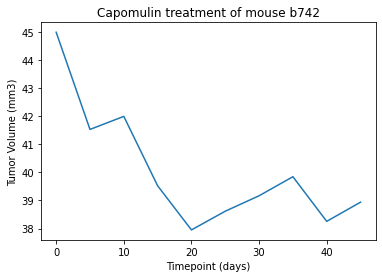

In [53]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cleandataset.loc[cleandataset['Drug Regimen'] == "Capomulin"]
b742_df = capomulin_df.loc[capomulin_df['Mouse ID']== 'b742']
plt.plot(b742_df['Timepoint'], b742_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b742')
plt.show()

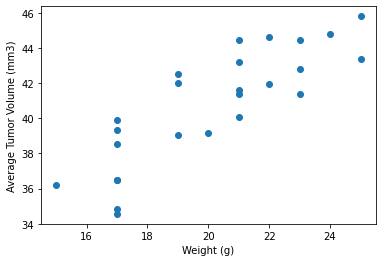

In [54]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleandataset.loc[cleandataset['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


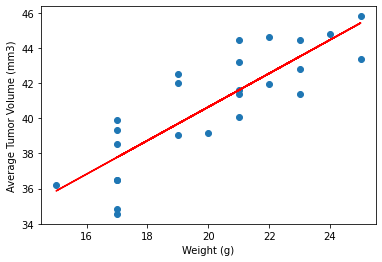

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = cleandataset.loc[cleandataset['Drug Regimen'] == "Capomulin"]
capomulin_average_df = capomulin_df.groupby(['Mouse ID']).mean()
# scipy.stats
# four types of correlations: Pearson correlation, Kendall rank correlation,
# Spearman correlation, and the Point-Biserial correlation
corr=round(st.pearsonr(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
y_values = capomulin_average_df['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average_df['Weight (g)'],capomulin_average_df['Tumor Volume (mm3)'])
plt.plot(capomulin_average_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()